# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('Olist_Eccomerce_Store_Data.csv')

In [55]:
df.head(5)

,Unnamed: 0,order_id,totalpayment_value,total_qty,product_id,seller_id,product_category_name,product_photos_qty,customer_id,delivery_days,customer_city,customer_state,order_purchase_month_year
0,0,00010242fe8c5a6d1ba2dd792cb16214,72.19,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,26,4.0,3ce436f183e68e07877b285a838db11a,7,728,18,2017-09
1,1,00018f77f2f0320c557190d7a144bdd3,259.83,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,63,2.0,f6dd3ec061db4e3987629fe6b26e5cce,16,3248,25,2017-04
2,2,000229ec398224ef6ca0657da4fc703e,216.87,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,54,2.0,6489ae5e4333f3693df5ad4372dab6d3,8,2632,10,2018-01
3,3,00024acbcdf0a6daa1e931b038114c75,25.78,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,62,1.0,d4eb9395c8c0431ee92fce09860c5a06,6,326,25,2018-08
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,40,1.0,58dbd0b2d70206bf40e62cd34e84d795,25,3978,25,2017-02


# Data Preprocessing


In [56]:
df=df.drop('Unnamed: 0',axis =1)

In [60]:
df.dtypes

order_id                      object
totalpayment_value           float64
total_qty                      int64
product_id                    object
seller_id                     object
product_category_name          int64
product_photos_qty           float64
customer_id                   object
delivery_days                  int64
customer_city                  int64
customer_state                 int64
order_purchase_month_year     object
dtype: object

In [57]:
# no null values
df.isnull().sum()

order_id                     0
totalpayment_value           0
total_qty                    0
product_id                   0
seller_id                    0
product_category_name        0
product_photos_qty           0
customer_id                  0
delivery_days                0
customer_city                0
customer_state               0
order_purchase_month_year    0
dtype: int64

In [58]:
# find correlation
df.corr()

,totalpayment_value,total_qty,product_category_name,product_photos_qty,delivery_days,customer_city,customer_state
totalpayment_value,1.000000,0.001509,0.009743,0.033240,0.069134,-0.025377,-0.059417
total_qty,0.001509,1.000000,0.000848,-0.004292,0.003776,0.001561,-0.001155
product_category_name,0.009743,0.000848,1.000000,0.081356,0.008290,0.000476,-0.010052
product_photos_qty,0.033240,-0.004292,0.081356,1.000000,-0.027410,-0.014295,-0.011117
delivery_days,0.069134,0.003776,0.008290,-0.027410,1.000000,-0.069125,-0.280684
customer_city,-0.025377,0.001561,0.000476,-0.014295,-0.069125,1.000000,0.261728
customer_state,-0.059417,-0.001155,-0.010052,-0.011117,-0.280684,0.261728,1.000000


<AxesSubplot:>

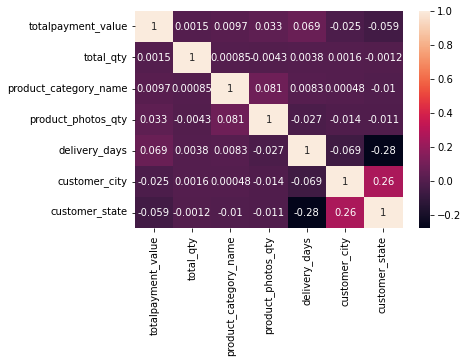

In [59]:
sns.heatmap(df.corr(), annot=True)

In [62]:
df.order_purchase_month_year.value_counts()

2017-11    7182
2018-01    6900
2018-03    6881
2018-04    6728
2018-05    6715
2018-02    6450
2018-08    6324
2018-07    6116
2018-06    6075
2017-12    5383
2017-10    4423
2017-08    4129
2017-09    4090
2017-07    3821
2017-05    3465
2017-06    3085
2017-03    2494
2017-04    2242
2017-02    1592
2017-01     737
Name: order_purchase_month_year, dtype: int64

In [63]:
# Ensuring Jan 2017-Sep 2018 is being considered
ops=df[(df.order_purchase_month_year>='2017-01')&(df.order_purchase_month_year<'2018-10')]

In [64]:
# Unique on Order_id level
ops.shape,ops.order_id.nunique()

((94832, 12), 94832)

In [65]:
mr=pd.DataFrame(ops.order_purchase_month_year.value_counts()).reset_index()
mr=ops.groupby(['order_purchase_month_year']).agg({'order_id':len,'totalpayment_value':sum}).reset_index()
mr.columns=['year_month','order_count','revenue_generated']

In [66]:
mr.year_month=mr.year_month.astype(str)
mr

,year_month,order_count,revenue_generated
0,2017-01,737,123671.01
1,2017-02,1592,259978.49
2,2017-03,2494,406959.60
3,2017-04,2242,381012.04
4,2017-05,3465,554452.93
5,2017-06,3085,484426.47
6,2017-07,3821,562439.22
7,2017-08,4129,639789.34
8,2017-09,4090,694180.29
9,2017-10,4423,732119.95


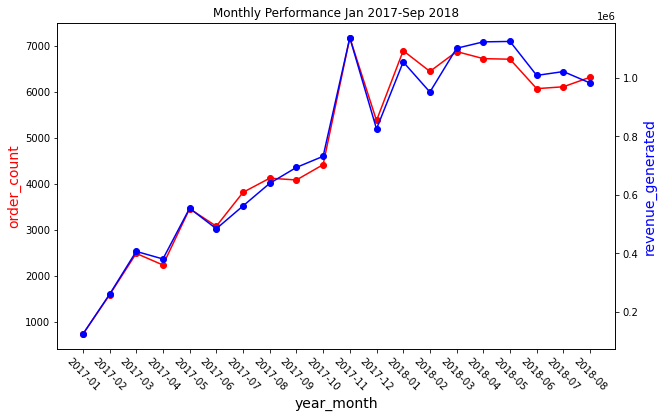

In [67]:
 
fig,ax = plt.subplots()
plt.xticks(rotation=-45)
 
ax.plot(mr.year_month, mr.order_count, color="red", marker="o")
 
ax.set_xlabel("year_month",fontsize=14)
 
ax.set_ylabel("order_count",color="red",fontsize=14)
ax.set_title('Monthly Performance Jan 2017-Sep 2018') 
ax2=ax.twinx()
 
ax2.plot(mr.year_month, mr.revenue_generated,color="blue",marker="o")
ax2.set_ylabel("revenue_generated",color="blue",fontsize=14)
fig.set_size_inches(10,6)
plt.show()


In [69]:
 # 2017-09 split it into year, and month
ops['month_purchase'] = ops['order_purchase_month_year'].apply(lambda x: x.split('-')[1]).astype(int)
ops['year_purchase'] = ops['order_purchase_month_year'].apply(lambda x: x.split('-')[0]).astype(int)

In [70]:
ops.columns

Index(['order_id', 'totalpayment_value', 'total_qty', 'product_id',
       'seller_id', 'product_category_name', 'product_photos_qty',
       'customer_id', 'delivery_days', 'customer_city', 'customer_state',
       'order_purchase_month_year', 'month_purchase', 'year_purchase'],
      dtype='object')

In [71]:
final_data = ops.copy()

# Splitting Data into Train and Test samples

In [73]:
from sklearn.model_selection import train_test_split

In [72]:
X = final_data[['total_qty', 'product_photos_qty','product_category_name',
             'delivery_days', 'customer_city',
       'customer_state', 'month_purchase']].values
y = final_data[['totalpayment_value']].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=82)

Use the numerical colums to predict totalpaymtent_value

In [75]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (71124, 7)
X_test: (23708, 7)
y_train: (71124, 1)
y_test: (23708, 1)


Create model Ensebal Methods

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
forest_random = RandomForestRegressor(n_estimators=43, random_state=82,min_samples_split=30, min_samples_leaf=1)
forest_random.fit(X_train, y_train.ravel())
y_pred = forest_random.predict(X_test)
# find the accuracy, mean absolute error, mean squared error, root mean squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Accuracy:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Accuracy: 0.11648495607857079
Mean Absolute Error: 103.16121200670999
Mean Squared Error: 40262.32517631125


In [78]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})


In [79]:
result.head(5)

,Actual,Predicted
0,43.22,151.040900
1,167.53,162.903038
2,62.38,57.542880
3,168.05,577.246446
4,88.08,163.645886


In [80]:
# using decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train.ravel())
y_pred_dt = dt.predict(X_test)


In [81]:
# using knn regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train.ravel())
y_pred_knn = knn.predict(X_test)

In [82]:
# using xgboost regressor
!pip install xgboost

In [83]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train.ravel())
y_pred_xgb = xgb.predict(X_test)

In [84]:
print('Accuracy Decision tree:', r2_score(y_test, y_pred_dt))
print('Accuracy:', r2_score(y_test, y_pred_knn))
print('Accuracy:', r2_score(y_test, y_pred_xgb))
print('Accuracy:', r2_score(y_test, y_pred))

Accuracy Decision tree: -1.0265948490426458
Accuracy: -0.1521229690145327
Accuracy: 0.08566246135521893
Accuracy: 0.11648495607857079


In [85]:
final_result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Predicted_dt': y_pred_dt.flatten(), 'Predicted_knn': y_pred_knn.flatten(), 'Predicted_xgb': y_pred_xgb.flatten()})
final_result.head(5)

,Actual,Predicted,Predicted_dt,Predicted_knn,Predicted_xgb
0,43.22,151.040900,173.590000,270.178,174.594254
1,167.53,162.903038,79.700000,69.002,145.366928
2,62.38,57.542880,67.266667,75.686,104.940376
3,168.05,577.246446,514.110000,167.770,610.517578
4,88.08,163.645886,138.890000,101.362,98.261200


In [86]:
final_result = pd.DataFrame({'Random Forest': [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))], 'Decision Tree': [r2_score(y_test, y_pred_dt), mean_absolute_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_dt), np.sqrt(mean_squared_error(y_test, y_pred_dt))], 'KNN': [r2_score(y_test, y_pred_knn), mean_absolute_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_knn), np.sqrt(mean_squared_error(y_test, y_pred_knn))], 'XGBoost': [r2_score(y_test, y_pred_xgb), mean_absolute_error(y_test, y_pred_xgb), mean_squared_error(y_test, y_pred_xgb), np.sqrt(mean_squared_error(y_test, y_pred_xgb))]}, index=['Accuracy', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

In [87]:
final_result.head()

,Random Forest,Decision Tree,KNN,XGBoost
Accuracy,0.116485,-1.026595,-0.152123,0.085662
Mean Absolute Error,103.161212,139.346310,120.010372,102.460126
Mean Squared Error,40262.325176,92353.176524,52502.953901,41666.925261
Root Mean Squared Error,200.654741,303.896654,229.135231,204.124779


In [88]:
# from above result we can see that Random Forest is giving better result
import pickle
pickle.dump(forest_random, open('model.pkl','wb'))